### Лабораторная работа №2
#### Дорохин Андрей 221-361
### Вариант №2

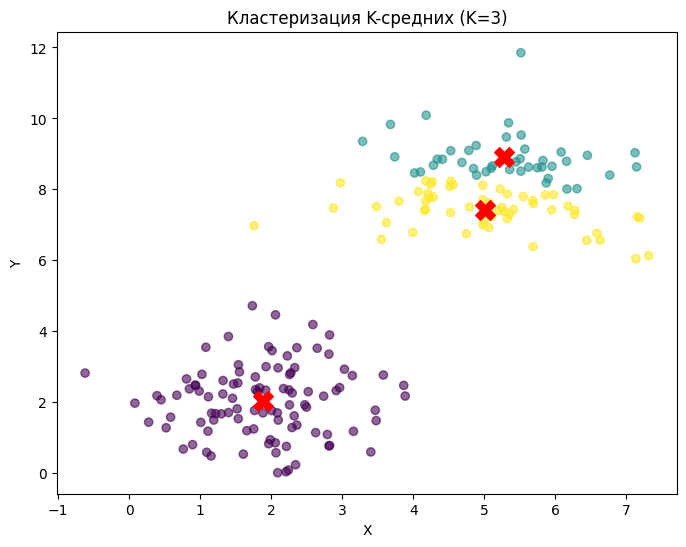

Суммарная квадратичная ошибка (SSE): 310.06
Силуэтный коэффициент: 0.51


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Генерация данных с тремя кластерами
np.random.seed(42)
centers = np.array([[2, 2], [5, 8], [8, 2]])
points_per_cluster = 100

data = np.vstack([
    np.random.normal(loc=centers[0], scale=1.0, size=(points_per_cluster, 2)),
    np.random.normal(loc=centers[1], scale=1.0, size=(points_per_cluster, 2)),
    np.random.normal(loc=centers[2], scale=1.0, size=(points_per_cluster, 2))
])
np.random.shuffle(data)

# Реализация алгоритма K-средних
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Применение алгоритма
k = 3
clusters, centroids = k_means(data, k)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('Кластеризация K-средних (K=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Оценка качества
sse = sum(np.sum((data[clusters == i] - centroids[i])**2) for i in range(k))
silhouette = silhouette_score(data, clusters)
print(f'Суммарная квадратичная ошибка (SSE): {sse:.2f}')
print(f'Силуэтный коэффициент: {silhouette:.2f}')

### 1. Что такое кластеризация и для чего она используется в машинном обучении?
#### Кластеризация
Кластеризация — это метод машинного обучения без учителя, который используется для группировки объектов (данных) на основе их схожести. Основная цель кластеризации — разделить данные на группы (кластеры) таким образом, чтобы объекты внутри одного кластера были более похожи друг на друга, чем на объекты из других кластеров.
#### Применение кластеризации:
- Сегментация данных: Например, сегментация клиентов по поведению, интересам или демографическим характеристикам.
- Поиск аномалий: Обнаружение объектов, которые не вписываются в общие кластеры.
- Сжатие данных: Упрощение данных путем группировки похожих объектов.
- Исследование данных: Поиск скрытых структур или закономерностей в данных.
### 2. Как работает алгоритм K-средних?
1) Случайным образом выбирается k центроидов
2) Оставшиеся точки назначаются в кластер ближайшего центроида
3) Среди кластеров выбирается среднее значение в качестве нового центроида
4) Шаги 2 и 3 выполняются до тех пор, пока не будет достигнуто максимальное количество итераций или центроиды перестанут значительно изменяться
### 3. Как выбрать оптимальное число кластеров K в алгоритме K-средних?
1) Метод локтя - Строится график зависимостей суммы квадратов внутрикластерных расстояний от k. Там где уменьшение замедляется (образуется локоть) находится оптимальное k
2) Метод силуэта - Для каждого k вычисляется силуэтный коэффициент для всех точек. Оптимальное k там где коэфициент силуэта выше
3) Метод расстояний - Сравнивается сумма внутрикластерных расстояний со случайными данными. Там где разрыв максимален k оптимально
### 4. Какие метрики используются для оценки качества кластеризации?
1) Силуэтный коэфициент. Оценивается насколько близко распределены объекты относительно центроида в сравнении с другими
2) Сумма квадратов внутрикластерных расстояний. Чем меньше значение тем компактнее кластер
3) Индекс Калински-Харабаса. Оценивает отношение дисперсии между кластерами к дисперсии внутри кластеров.